In [2]:
!pip install autocorrect

  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=a144224f125dbe5a8ee422902ffc22a529d8be6566daeabadf170e15e3c45e06
  Stored in directory: c:\users\sandi\appdata\local\pip\cache\wheels\72\b8\3b\a90246d13090e85394a8a44b78c8abf577c0766f29d6543c75
Successfully built autocorrect


In [33]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from autocorrect import Speller
spell = Speller()
from wordcloud import WordCloud
import re

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("spam-ham v2.csv", encoding='ISO-8859-1')
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar then Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.rename(columns={'v1':'labels','v2':'messages'}, inplace=True)
data.sample()

,labels,messages
1778,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...


In [8]:
# Lets vvisualize the spam and ham words

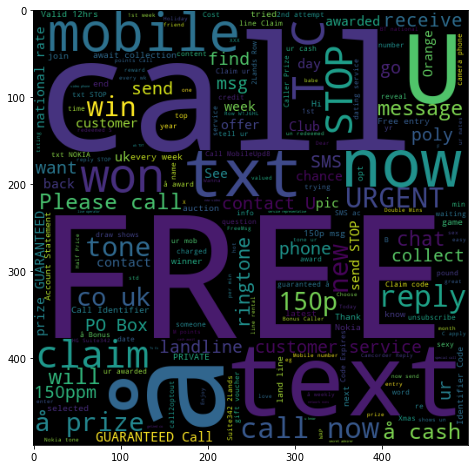

In [18]:
spam_words = ' '.join(list(data[data['labels'] == 'spam']['messages']))
spam_wc = WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

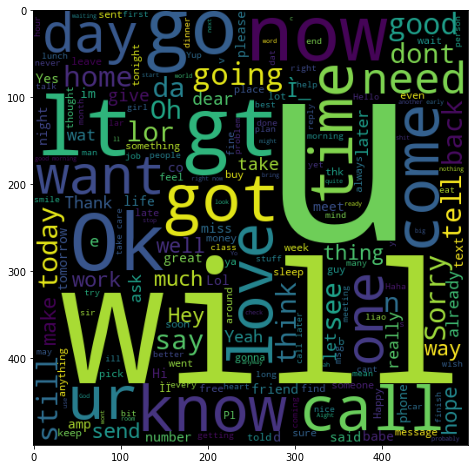

In [19]:
spam_words = ' '.join(list(data[data['labels'] == 'ham']['messages']))
spam_wc = WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

In [20]:
# Preprocessing the data

In [22]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
# preprocessing the Messages
new_data=[]

for i in range(data.shape[0]):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)

In [35]:
Y=data['labels']
Y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: labels, Length: 5572, dtype: object

### splitting the data into training and testing

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.25)

In [37]:
X_train

['ur hmv quiz cash balance current maxim ur cash send hmv p msg',
 'will go app class',
 'stay town',
 'hav almost reach call unable connect u',
 'usual person unconsci children adult may behave norm call',
 'love set soul fire spark flame big raw flame oxo',
 'than time spent geva bin mint ur baby want u xxxx',
 'never not',
 'think get away trek long family town sorry',
 'urgent nd attempt contact u u call b cbc wc n xx callcost ppmmobilesvari max',
 'wait still clear sure sarcasm x want live us',
 'than day u r goodman think ur rite sari abuse u cheer love u franyxxxxx',
 'urgent costa del sol holiday await collect call claim sae tc box stockport sk xh cost pm max min',
 'lol oh got friend dog',
 'nd attempt contract u week top prize either cash prize call',
 'lmaz nice',
 'stop howe suggest stay someone abl give or every stool',
 'serious like proper tongue',
 'u away snow',
 'india win level semi mean record',
 'mani time told stage use laugh listen aha',
 'buy today need c meh',


### Vectorization using Bag of Words

In [38]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_idf
matrix=CountVectorizer()

In [39]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

### Lets train our Model - Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [41]:
model.fit(X_train_vect,Y_train)

GaussianNB()

In [42]:
model.classes_

array(['ham', 'spam'], dtype='<U4')

In [43]:
Y_pred=model.predict(X_test_vect)

In [44]:
Y_pred

array(['spam', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
accuracy_score(Y_test,Y_pred) * 100

86.00143575017947

In [47]:
confusion_matrix(Y_test,Y_pred)

array([[1056,  175],
       [  20,  142]], dtype=int64)